In [1]:
%matplotlib inline

# Import Dependencies
import json
import requests
import numpy as np
import pandas as pd
from citipy import citipy
from config import api_key
from random import uniform
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Create a DataFrame to append City and Country code
series_names = ["City", "Country"]
city_name_df = pd.DataFrame(columns = series_names)

In [3]:
# Use random to generate unbiased list of cities
for x in range(2000):
    lat, lon = np.random.uniform(low = -90.000, high = 90.000), np.random.uniform(low = -180.000, high = 180.000)
    city = citipy.nearest_city(lat,lon)
    city_name_df = city_name_df.append({"City": city.city_name,"Country": city.country_code}, ignore_index = True)
    
# Remove duplicate cities
city_name_df = city_name_df.drop_duplicates(subset = "City").reset_index()
city_name_df.count()

index      637
City       637
Country    637
dtype: int64

In [4]:
series_names = ["City",
                "Country",
                "Latitude",
                "Longitude",
                "Temperature $F^o$",
                "% Humidity",
                "% Cloudiness",
                "Wind Speed (mph)"
               ]

# Print DataFrame to check series titles
new_city_df = pd.DataFrame(columns = series_names)
new_city_df

,City,Country,Latitude,Longitude,Temperature $F^o$,% Humidity,% Cloudiness,Wind Speed (mph)


In [5]:
# # Test URL
# url = "http://api.openweathermap.org/data/2.5/weather?"
# target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + "San Diego, California"
# city_query = requests.get(target_url).json()
# print(json.dumps(city_query, indent = 2, sort_keys = True))

In [6]:
# Build URL to openweathermap
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

# Set up loop to find API's for each city
for index, row in city_name_df.iterrows():
    target_city = row["City"]
    units = "IMPERIAL"
    target_url = url + "appid=" + api_key + "&units=" + units + "&q=" + target_city.replace(" ","+")
    city_query = requests.get(target_url).json()
    
    if city_query["cod"] == "404":
        print("Cannot find City.")
        
    else:
        new_city_df.set_value(index, "City", city_query["name"])
        new_city_df.set_value(index, "Country", city_query["sys"]["country"])
        new_city_df.set_value(index, "Temperature $F^o$", city_query["main"]["temp"])
        new_city_df.set_value(index, "Latitude", city_query["coord"]["lat"])
        new_city_df.set_value(index, "Longitude", city_query["coord"]["lon"])
        new_city_df.set_value(index, "% Humidity", city_query["main"]["humidity"])
        new_city_df.set_value(index, "% Cloudiness", city_query["clouds"]["all"])
        new_city_df.set_value(index, "Wind Speed (mph)", city_query["wind"]["speed"])
        
        print("***************")
        print("City # ", row_count, " --> ", city_query["name"], city_query["sys"]["country"])
        print(target_url)
        row_count += 1

Cannot find City.


C:\Users\Beau\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Beau\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Beau\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Beau\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Beau\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. 

***************
City #  1  -->  Kapaa US
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=kapaa
***************
City #  2  -->  Rovaniemi FI
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=rovaniemi
***************
City #  3  -->  Pevek RU
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=pevek
***************
City #  4  -->  Carutapera BR
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=carutapera
***************
City #  5  -->  Kumo NG
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=kumo
***************
City #  6  -->  Richards Bay ZA
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=richards+bay
***************
City #  7  -->  Esperance TT
http://api.openweathermap

***************
City #  53  -->  Vardo US
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=vardo
***************
City #  54  -->  Haines Junction CA
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=haines+junction
***************
City #  55  -->  Tuapse RU
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=tuapse
***************
City #  56  -->  Saskylakh RU
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=saskylakh
***************
City #  57  -->  Souillac FR
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=souillac
***************
City #  58  -->  New Norfolk AU
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=new+norfolk
***************
City #  59  -->  Cape Town ZA


***************
City #  104  -->  Leningradskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=leningradskiy
***************
City #  105  -->  Ribeira Grande PT
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=ribeira+grande
***************
City #  106  -->  Kruisfontein ZA
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=kruisfontein
***************
City #  107  -->  Kolomna RU
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=kolomna
***************
City #  108  -->  Marand IR
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=marand
***************
City #  109  -->  Marsa Matruh EG
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=marsa+matruh
***************
City

***************
City #  156  -->  Severo-Kurilsk RU
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=severo-kurilsk
***************
City #  157  -->  Kahului US
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=kahului
***************
City #  158  -->  Ponta do Sol BR
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=ponta+do+sol
***************
City #  159  -->  Puerto Leguizamo CO
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=puerto+leguizamo
***************
City #  160  -->  Saint George GR
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=saint+george
***************
City #  161  -->  Rockland US
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=rockland
**********

***************
City #  208  -->  Castro CL
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=castro
***************
City #  209  -->  Bara NG
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=bara
Cannot find City.
***************
City #  210  -->  Bystryy Istok RU
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=bystryy+istok
***************
City #  211  -->  Barra do Garcas BR
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=barra+do+garcas
***************
City #  212  -->  Mehamn NO
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=mehamn
Cannot find City.
***************
City #  213  -->  Suicheng CN
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=suicheng
********

***************
City #  259  -->  Tawau MY
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=tawau
Cannot find City.
***************
City #  260  -->  Talara PE
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=talara
***************
City #  261  -->  Bantva IN
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=bantva
***************
City #  262  -->  Kerewan GM
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=kerewan
***************
City #  263  -->  Turukhansk RU
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=turukhansk
***************
City #  264  -->  Chifeng CN
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=chifeng
***************
City #  265  -->  Tazovskiy RU
h

***************
City #  310  -->  Nishihara JP
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=nishihara
***************
City #  311  -->  Nauta PE
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=nauta
Cannot find City.
***************
City #  312  -->  Kavaratti IN
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=kavaratti
***************
City #  313  -->  Westport IE
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=westport
***************
City #  314  -->  Russell AR
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=russell
***************
City #  315  -->  Umrala IN
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=umrala
***************
City #  316  -->  North Pl

***************
City #  361  -->  Provideniya RU
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=provideniya
***************
City #  362  -->  Alanya TR
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=alanya
***************
City #  363  -->  Wahpeton US
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=wahpeton
***************
City #  364  -->  Afyonkarahisar TR
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=afyonkarahisar
***************
City #  365  -->  Puerto Penasco MX
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=puerto+penasco
***************
City #  366  -->  Touros BR
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=touros
***************
City #  367  -

***************
City #  412  -->  Porosozero RU
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=porosozero
Cannot find City.
***************
City #  413  -->  Labuhan ID
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=labuhan
Cannot find City.
Cannot find City.
Cannot find City.
***************
City #  414  -->  Tavda RU
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=tavda
***************
City #  415  -->  Port Macquarie AU
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=port+macquarie
***************
City #  416  -->  Catacocha EC
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=catacocha
***************
City #  417  -->  Rosarito CO
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d

***************
City #  463  -->  Praia da Vitoria PT
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=praia+da+vitoria
***************
City #  464  -->  Skoghall SE
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=skoghall
***************
City #  465  -->  Nuuk GL
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=nuuk
Cannot find City.
***************
City #  466  -->  Locri IT
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=locri
***************
City #  467  -->  Segezha RU
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=segezha
***************
City #  468  -->  Northam GB
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=northam
***************
City #  469  -->  Ku

***************
City #  515  -->  Dillon US
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=dillon
***************
City #  516  -->  Belle Fourche US
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=belle+fourche
***************
City #  517  -->  Pangai TO
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=pangai
***************
City #  518  -->  Natal BR
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=natal
***************
City #  519  -->  Puerto Maldonado PE
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=puerto+maldonado
***************
City #  520  -->  Hovd NO
http://api.openweathermap.org/data/2.5/weather?appid=a32b8d352fb0f8bf3e091bf38565d963&units=IMPERIAL&q=hovd
***************
City #  521  -->  Meulaboh ID
ht

In [7]:
new_city_df.head()

,City,Country,Latitude,Longitude,Temperature $F^o$,% Humidity,% Cloudiness,Wind Speed (mph)
1,Kapaa,US,22.08,-159.32,84.2,70,75,18.34
2,Rovaniemi,FI,66.5,25.72,55.4,76,0,3.36
3,Pevek,RU,69.7,170.27,45.72,93,0,2.37
4,Carutapera,BR,-1.2,-46.02,78.66,85,0,9.53
5,Kumo,NG,10.05,11.21,70.11,99,80,7.18


In [8]:
# Save DataFrame to csv file
new_city_df.to_csv("WeatherPy_DataFrame", index_label = "City #")

In [9]:
# Set up timestamp for plot titles
timestamp = datetime.now().strftime('%B %d %Y')
print(timestamp)

August 05 2018


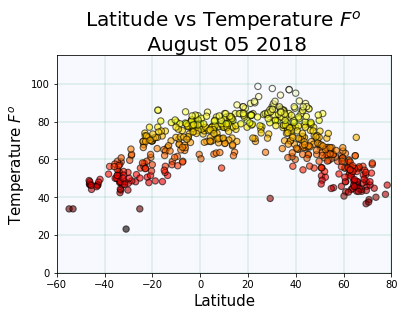

In [10]:
# Set up title, axis labels and graph features
fig, ax = plt.subplots()
plt.title(f"Latitude vs Temperature $F^o$ \n {timestamp}",fontsize=20)
plt.xlabel("Latitude", fontsize= 15)
plt.ylabel("Temperature $F^o$", fontsize= 15)
plt.grid(color = "mediumseagreen", linewidth = .25, )
plt.xlim([-60, 80])
plt.ylim([0,115])
ax.set_facecolor("ghostwhite")


# Set up Scatter Plot for Latitude vs. Temperature
plt.scatter(new_city_df["Latitude"],
            new_city_df["Temperature $F^o$"],
            c = new_city_df["Temperature $F^o$"],
            s = 40,
            marker = "o",
            cmap = "hot",
            alpha = .60,
            edgecolor = "black",
            linewidths = 1.1,
           )

# Save image
plt.savefig("images/Latitude_Temperature", bbox_inches = "tight", dpi = 100)
plt.show()

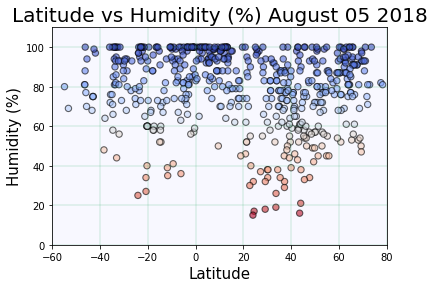

In [11]:
# Set up title, axis labels and graph features
fig2, ax = plt.subplots()
plt.title(f"Latitude vs Humidity (%) {timestamp}",
fontsize=20)
plt.xlabel("Latitude",fontsize= 15)
plt.ylabel("Humidity (%)",fontsize= 15)
plt.grid(color = "mediumseagreen", linewidth = .25)
plt.xlim([-60, 80])
plt.ylim([-0,110])
ax.set_facecolor("ghostwhite")

# Set up Scatter Plot for Latitude vs. Humidity
plt.scatter(new_city_df["Latitude"],
            new_city_df["% Humidity"],
            c = new_city_df["% Humidity"],
            s = 40,
            marker = "o",
            cmap = "coolwarm_r",
            alpha = .60,
            edgecolor = "black",
            linewidths = 1.1,
           )

# Save image
plt.savefig("images/Latitude_Humidity", bbox_inches = "tight", dpi = 100)
plt.show()

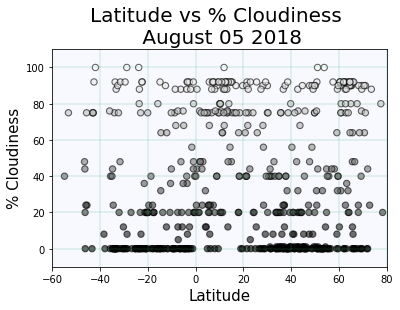

In [12]:
# Set up title, axis labels and graph features
fig3, ax = plt.subplots()
plt.title(f"Latitude vs % Cloudiness \n {timestamp}",fontsize=20)
plt.xlabel("Latitude",fontsize= 15)
plt.ylabel("% Cloudiness",fontsize= 15)
plt.grid(color = "mediumseagreen", linewidth = .25)
plt.xlim([-60, 80])
plt.ylim([-10,110])
ax.set_facecolor("ghostwhite")

# Set up Scatter Plot for Latitude vs. Cloudiness
plt.scatter(new_city_df["Latitude"],
            new_city_df["% Cloudiness"],
            c = new_city_df["% Cloudiness"],
            s = 40,
            marker = "o",
            cmap = "gist_yarg_r",
            alpha = .60,
            edgecolor = "black",
            linewidths = 1.1,
           )

# Save image
plt.savefig("images/Latitude_Cloudiness", bbox_inches = "tight", dpi = 100)
plt.show()

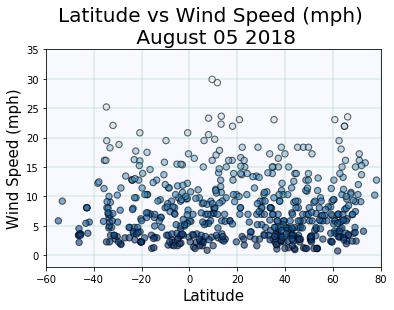

In [13]:
# Set up title, axis labels and graph features
fig4, ax = plt.subplots()
plt.title(f"Latitude vs Wind Speed (mph) \n {timestamp}",fontsize=20)
plt.xlabel("Latitude",fontsize= 15)
plt.ylabel("Wind Speed (mph)",fontsize= 15)
plt.grid(color = "mediumseagreen", linewidth = .25)
plt.xlim([-60, 80])
plt.ylim([-2,35])
ax.set_facecolor("ghostwhite")

# Set up Scatter Plot for Latitude vs. Wind Speed (mph)
plt.scatter(new_city_df["Latitude"],
            new_city_df["Wind Speed (mph)"],
            c = new_city_df["Wind Speed (mph)"],
            s = 40,
            marker = "o",
            cmap = "Blues_r",
            alpha = .60,
            edgecolor = "black",
            linewidths = 1.1,
           )

# Save image
plt.savefig("images/Latitude_Wind", bbox_inches = "tight", dpi = 100)
plt.show()

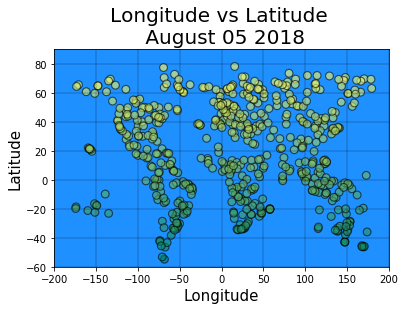

In [15]:
# Set up title, axis labels and graph features
fig5, ax = plt.subplots()
plt.title(f"Longitude vs Latitude \n {timestamp}",
fontsize=20)
plt.xlabel("Longitude",fontsize= 15)
plt.ylabel("Latitude",fontsize= 15)
plt.grid(color = "black", linewidth = .25)
plt.xlim([-200, 200])
plt.ylim([-60,90])
ax.set_facecolor("dodgerblue")

# Set up Scatter Plot for Latitude vs. Wind Speed (mph)
plt.scatter(new_city_df["Longitude"],
            new_city_df["Latitude"],
            c = new_city_df["Latitude"],
            s = 60,
            marker = "o",
            cmap = "summer",
            alpha = .60,
            edgecolor = "black",
            linewidths = 1.1,
           )

# Save image
plt.savefig("images/Latitude_Longitude", bbox_inches = "tight", dpi = 100)
plt.show()